In [2]:
# List of example sentences with varying degrees of similarity
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A fast, brown fox leaps over a sleepy dog.",
    "Artificial intelligence is transforming the world.",
    "Machine learning is a subset of artificial intelligence.",
    "She sells seashells by the seashore.",
    "He sells handmade crafts at the market.",
    "The weather today is sunny with a chance of rain.",
    "Tomorrow's forecast predicts thunderstorms.",
    "I love programming in Python.",
    "Python is a popular programming language.",
    "The capital of France is Paris.",
    "Tokyo is the capital of Japan.",
    "He enjoys playing basketball on weekends.",
    "She likes to play soccer during her free time.",
    "Reading books can expand your knowledge.",
    "Watching documentaries can also be educational.",
    "The cat sat on the mat.",
    "The dog lay on the rug.",
    "Machine learning algorithms can analyze large datasets.",
    "Big data analysis often involves machine learning techniques."
]

The quick brown fox jumps over the lazy dog.
A fast, brown fox leaps over a sleepy dog.
Artificial intelligence is transforming the world.
Machine learning is a subset of artificial intelligence.
She sells seashells by the seashore.
He sells handmade crafts at the market.
The weather today is sunny with a chance of rain.
Tomorrow's forecast predicts thunderstorms.
I love programming in Python.
Python is a popular programming language.
The capital of France is Paris.
Tokyo is the capital of Japan.
He enjoys playing basketball on weekends.
She likes to play soccer during her free time.
Reading books can expand your knowledge.
Watching documentaries can also be educational.
The cat sat on the mat.
The dog lay on the rug.
Machine learning algorithms can analyze large datasets.
Big data analysis often involves machine learning techniques.


In [3]:
from sentence_transformers import SentenceTransformer

c:\BISS\ragsum\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model = SentenceTransformer("bert-base-nli-mean-tokens")

In [7]:
sentence_vecs = model.encode(sentences=sentences)

sentence_vecs[0:3]

array([[-0.74899274,  0.71891856, -1.0394562 , ...,  0.15582563,
         1.0202518 ,  0.09790381],
       [-0.5842707 ,  0.71095604, -0.97139174, ..., -0.19675304,
         0.83905506,  0.12268039],
       [ 0.09159014, -0.2326017 ,  1.1682514 , ..., -0.82319766,
        -0.79390264, -0.09168123]], dtype=float32)

In [8]:
sentence_vecs.shape

(20, 768)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_with_first = cosine_similarity(
    [sentence_vecs[0]],
    sentence_vecs[1:]
)

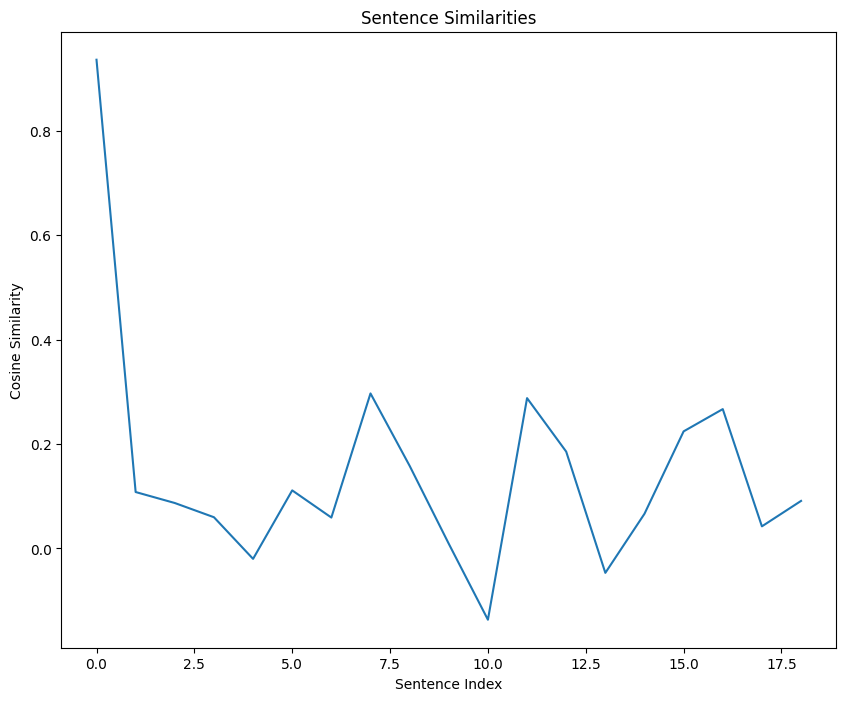

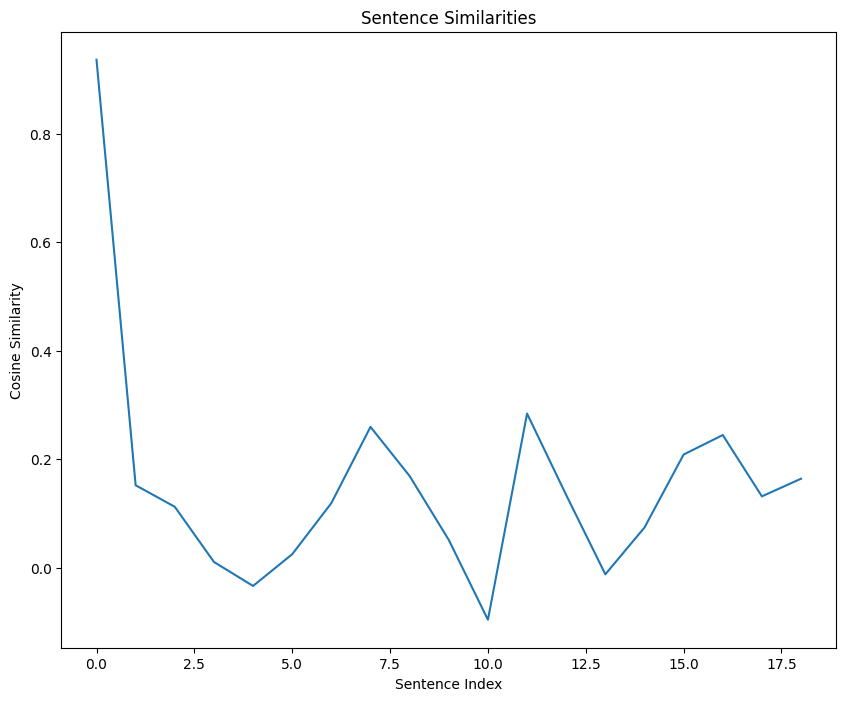

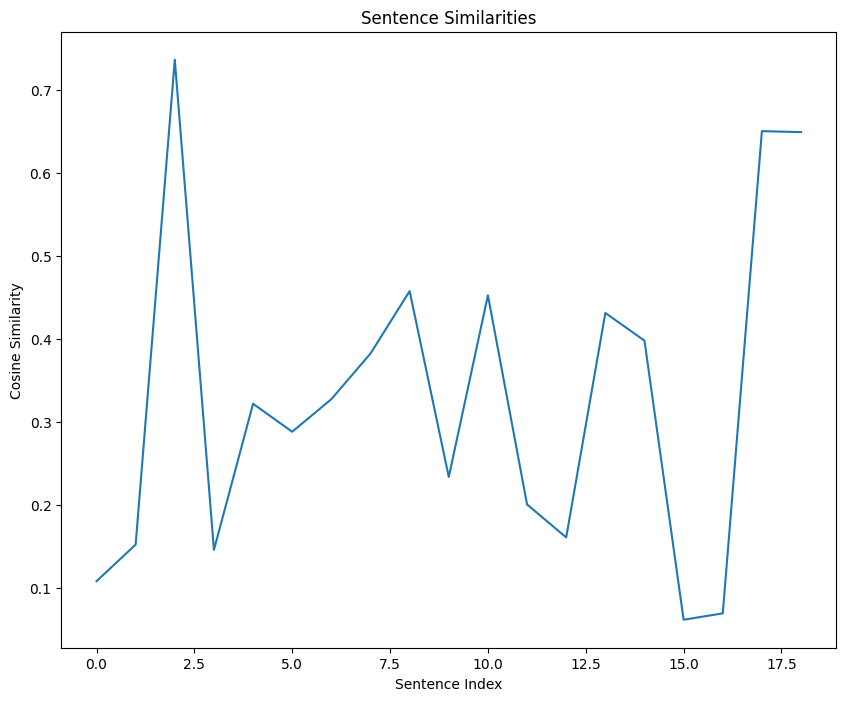

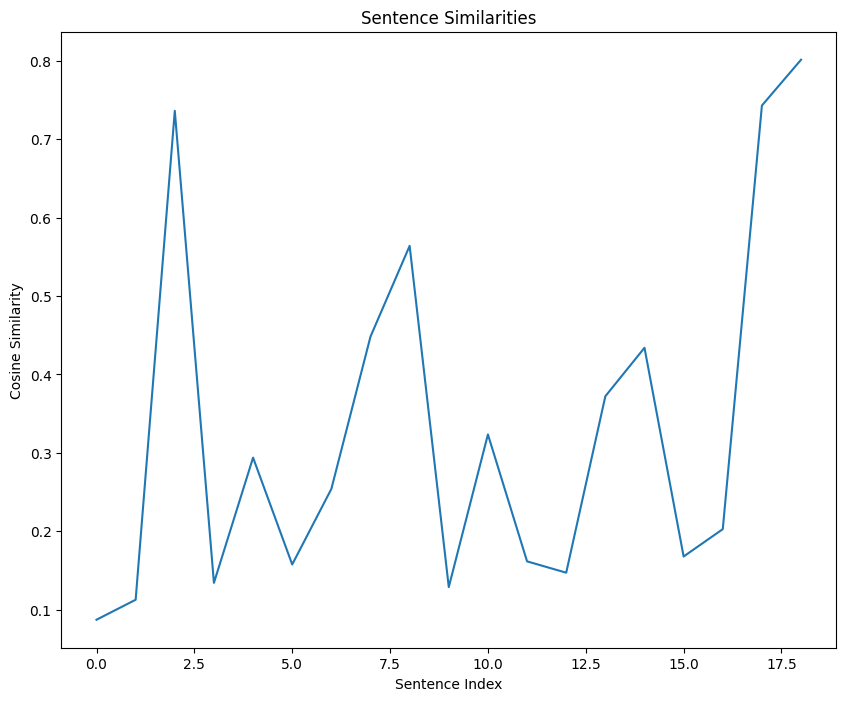

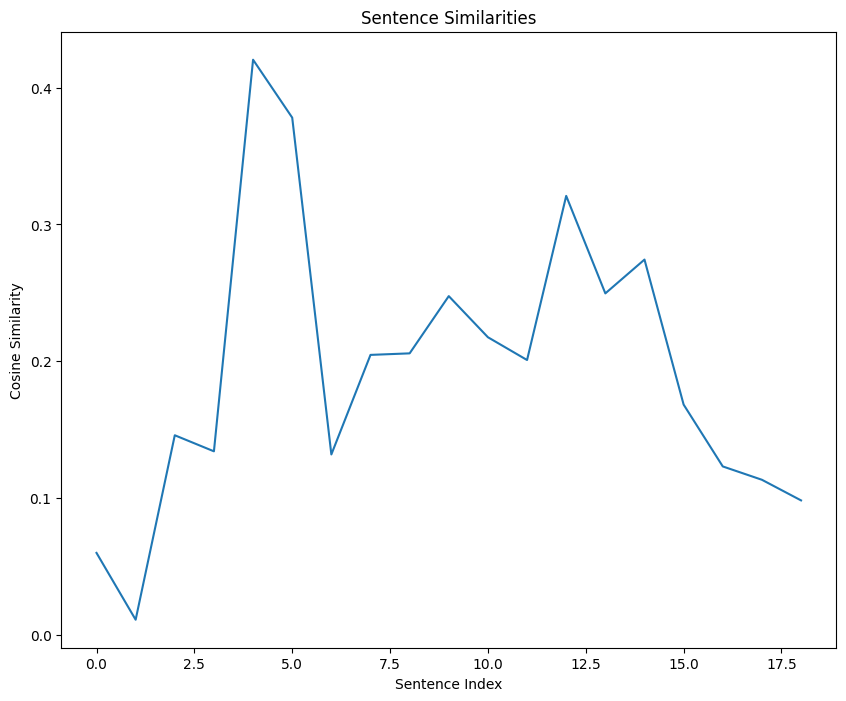

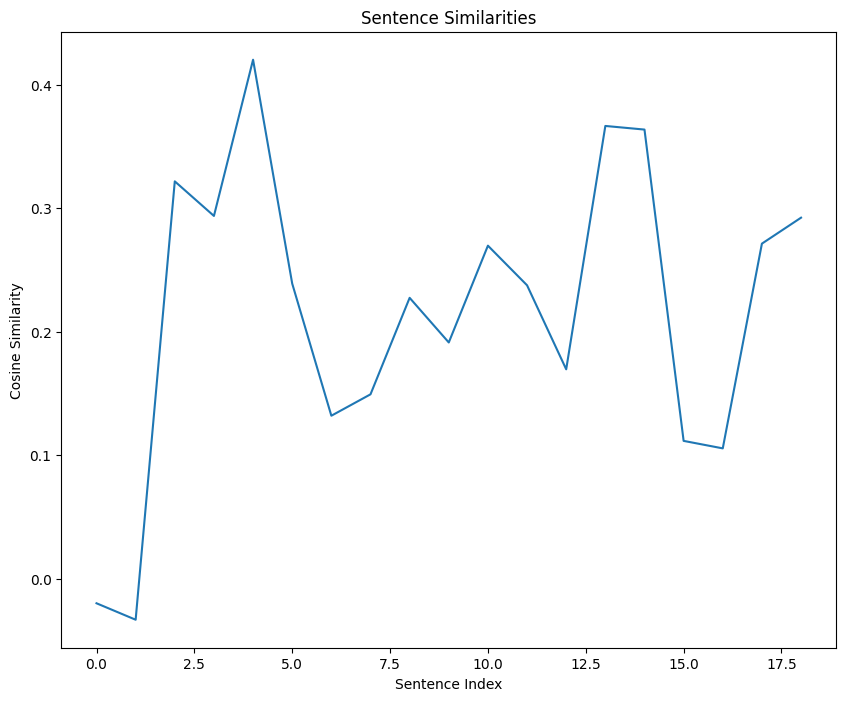

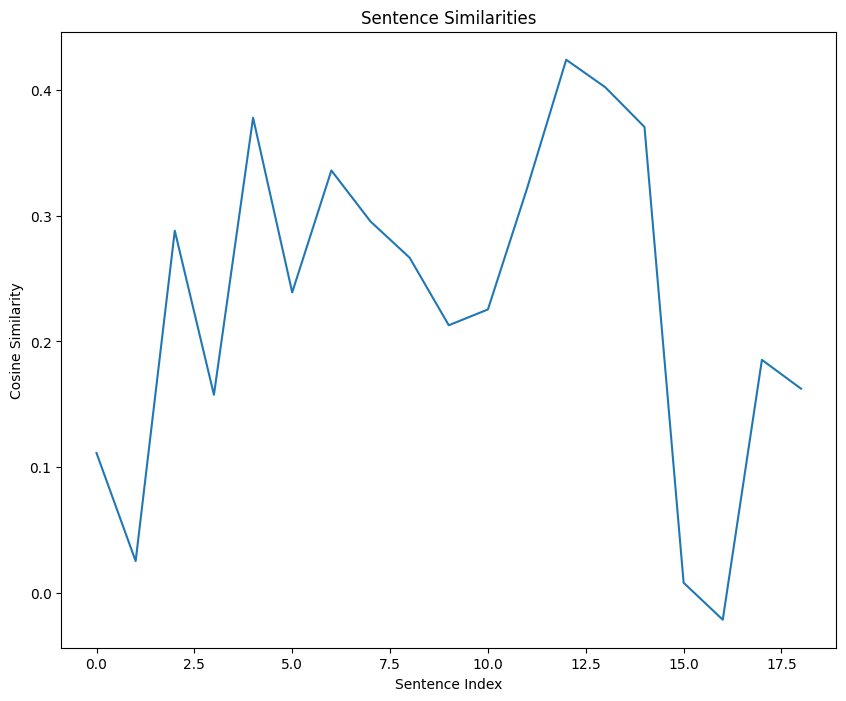

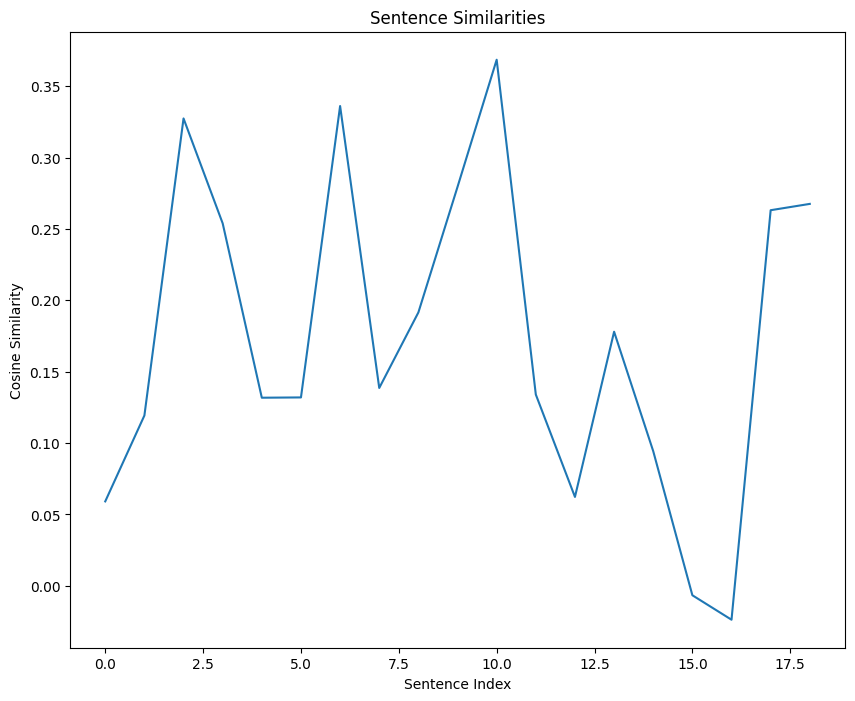

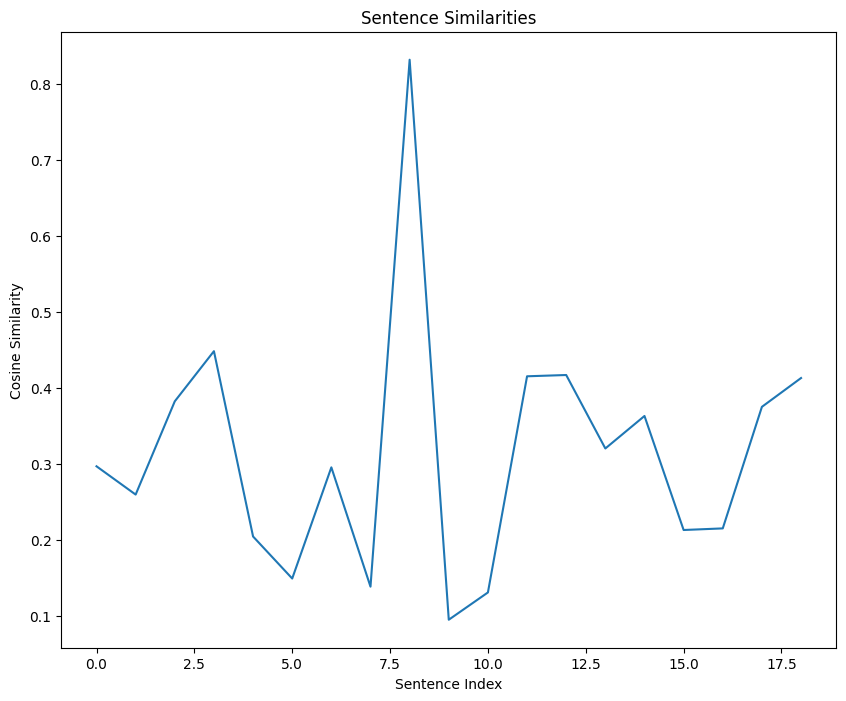

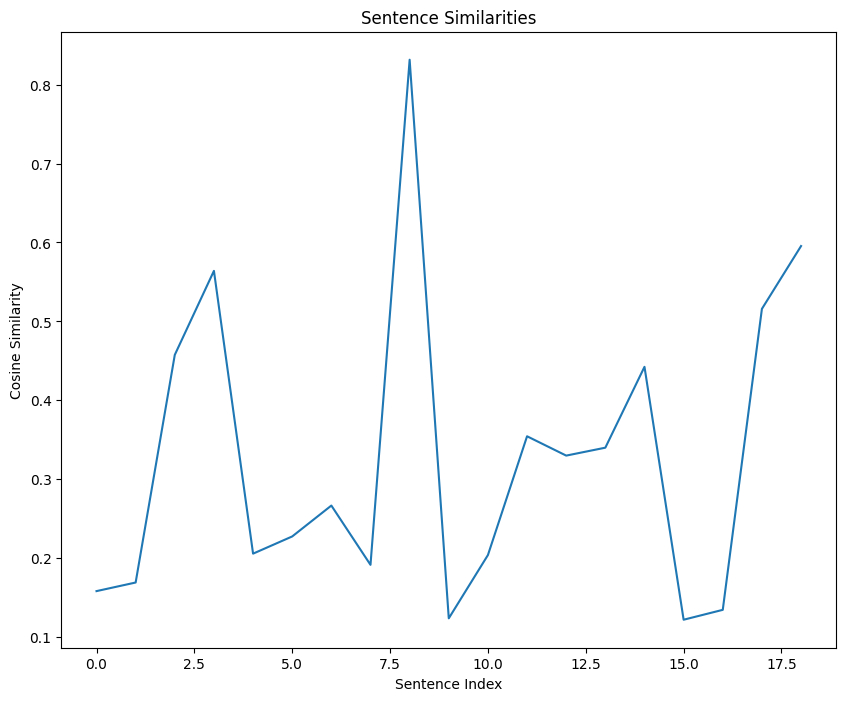

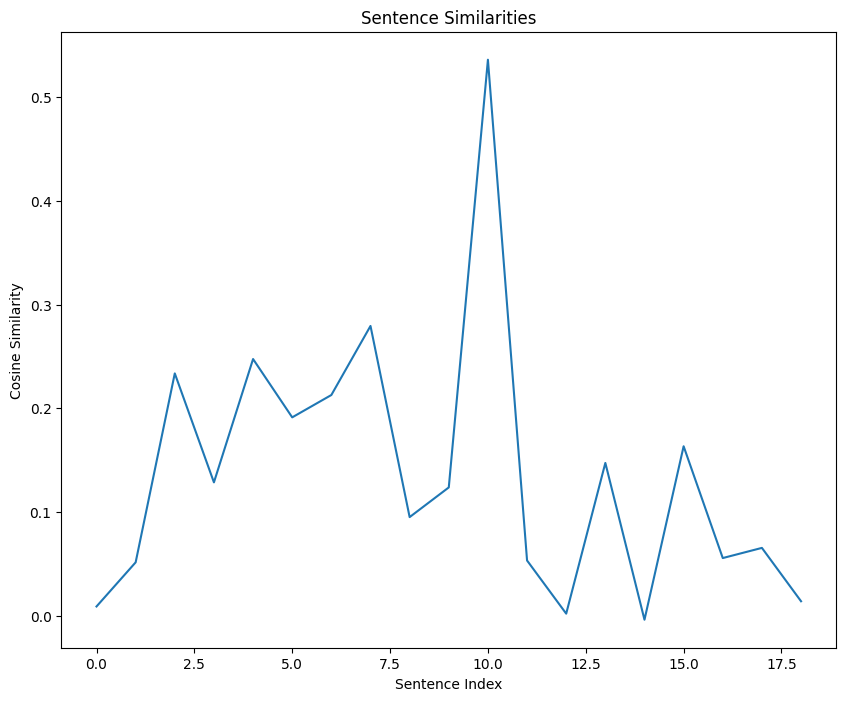

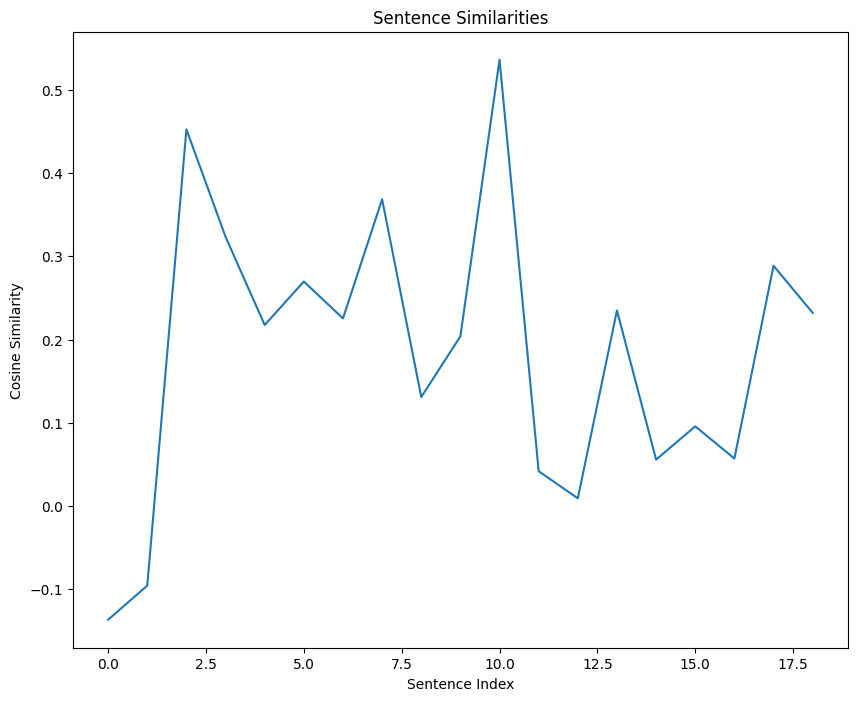

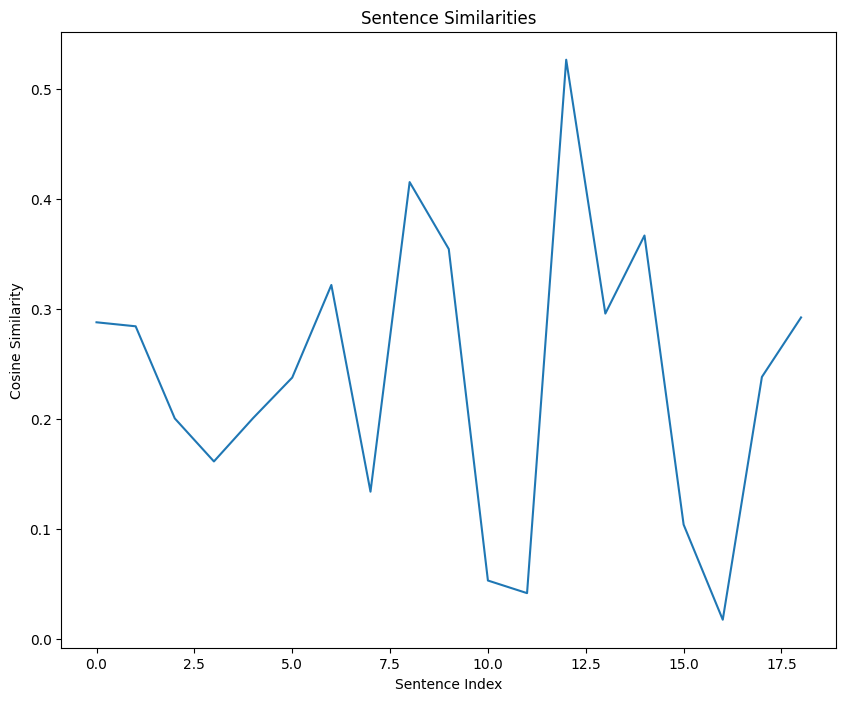

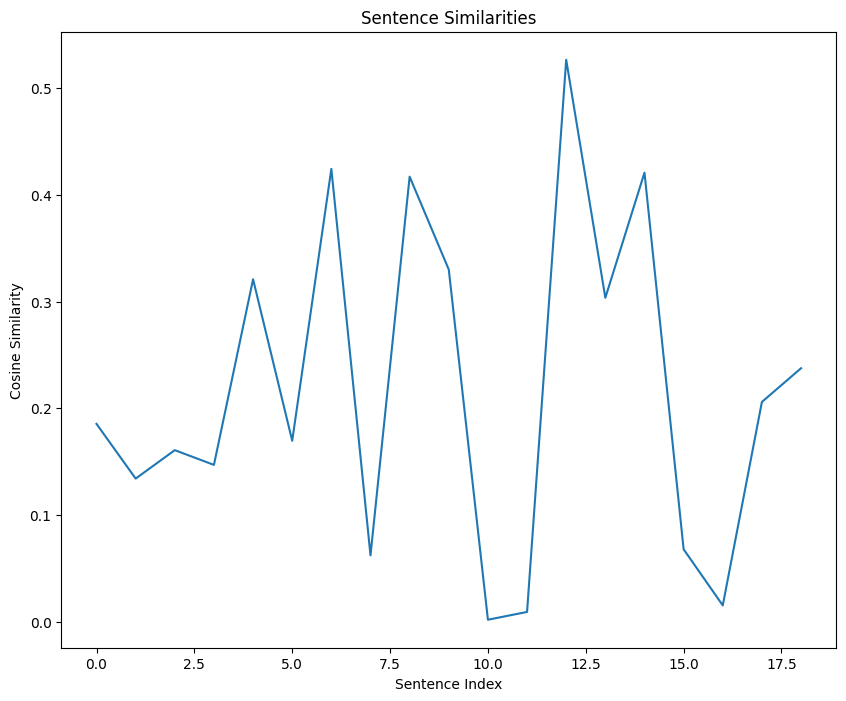

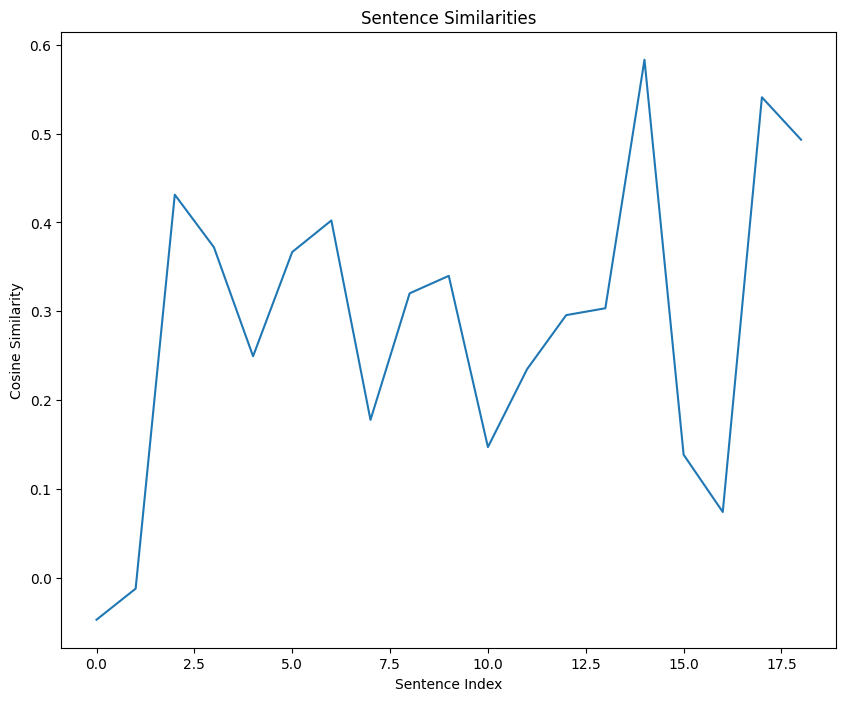

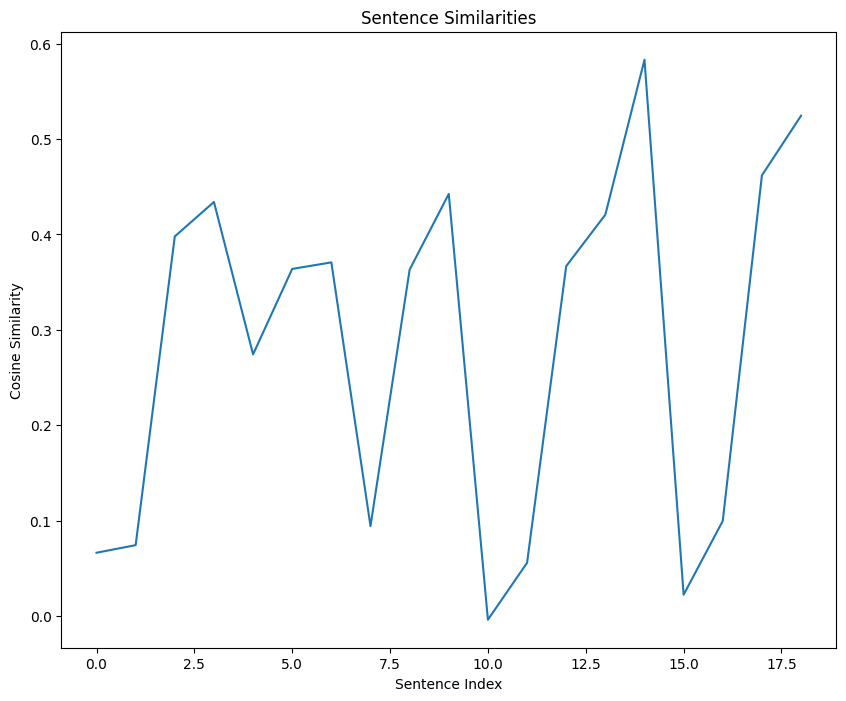

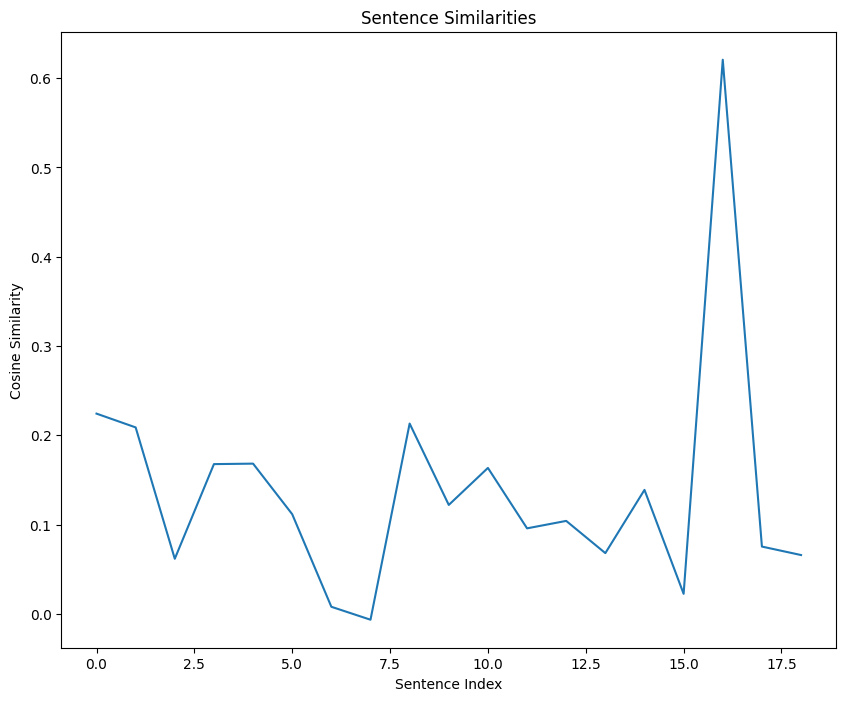

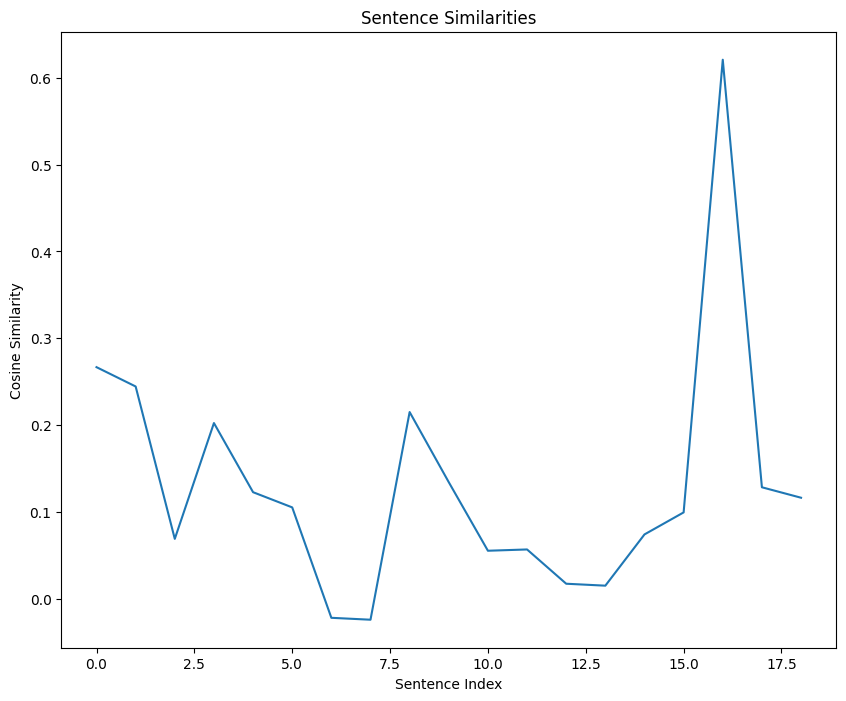

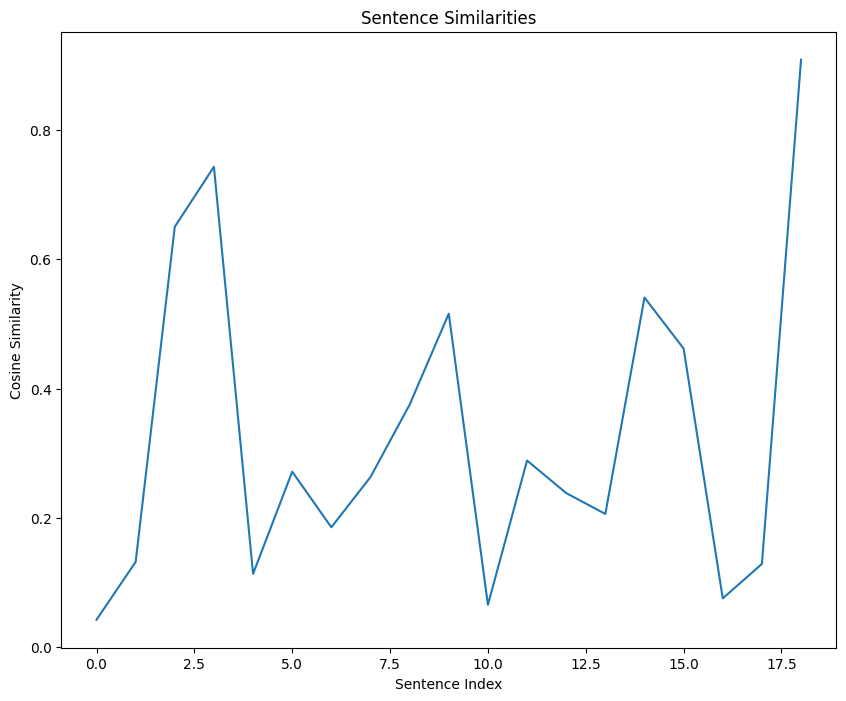

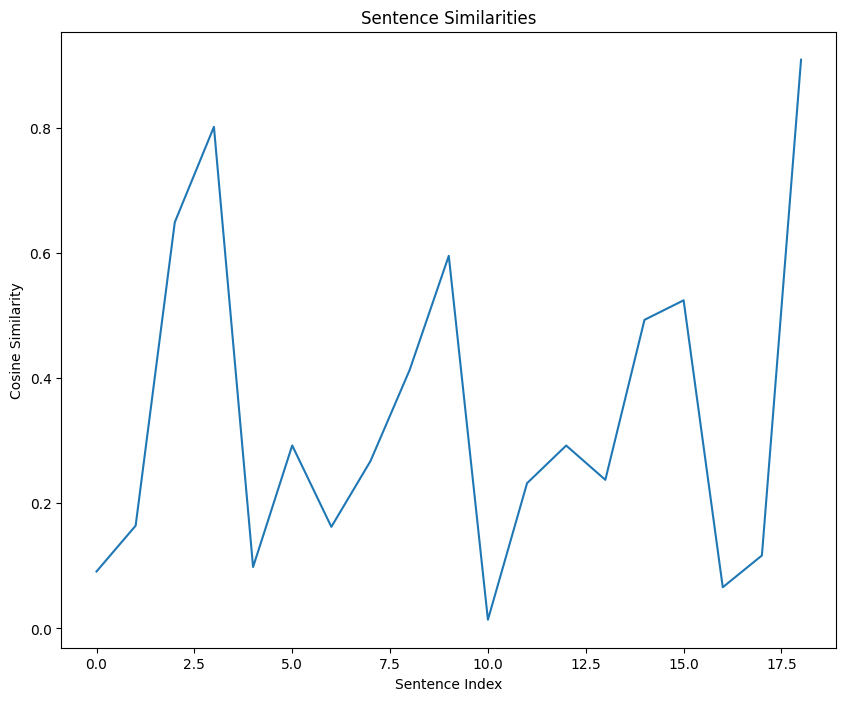

[[0, 1], [1, 0], [2, 3], [3, 19], [4, 5], [5, 4], [6, 13], [7, 11], [8, 9], [9, 8], [10, 11], [11, 10], [12, 13], [13, 12], [14, 15], [15, 14], [16, 17], [17, 16], [18, 19], [19, 18]]
[0.9361578, 0.9361578, 0.73639476, 0.8015937, 0.4204347, 0.4204347, 0.42423242, 0.36852485, 0.8316123, 0.8316123, 0.5362065, 0.5362065, 0.52644455, 0.52644455, 0.5830927, 0.5830927, 0.62067723, 0.62067723, 0.9088583, 0.9088583]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sentence_vecs is a NumPy array of shape (n, d)
sentence_vecs = np.array(sentence_vecs)

most_similar_indices = []
most_similar_values = []
for i in range(len(sentence_vecs)):
    similarities = cosine_similarity(
        sentence_vecs[i].reshape(1, -1), np.delete(sentence_vecs, i, axis=0)
    )
    max_index = np.argmax(similarities)  # Find the index of the max similarity
    if max_index >= i:  # Adjust index because np.delete shifts elements
        max_index += 1
    most_similar_indices.append([i, max_index])
    most_similar_values.append(similarities[0, np.argmax(similarities)])

    plt.figure(figsize=(10, 8))
    for i in range(len(similarities)):
        plt.plot(similarities[i])

    plt.title("Sentence Similarities")
    plt.xlabel("Sentence Index")
    plt.ylabel("Cosine Similarity")
    plt.show()  

print(most_similar_indices)
print(most_similar_values)

In [17]:
for i in range(len(sentence_vecs)):
    print(f'Original sentence:\n    {sentences[i]}')
    print(f'Most similar sentence:\n    {sentences[most_similar_indices[i]]}')
    print(f'Cosine similarity measure: {most_similar_values[i]}')
    print(f'\n')

Original sentence:
    The quick brown fox jumps over the lazy dog.
Most similar sentence:
    A fast, brown fox leaps over a sleepy dog.
Cosine similarity measure: 0.9361578226089478


Original sentence:
    A fast, brown fox leaps over a sleepy dog.
Most similar sentence:
    The quick brown fox jumps over the lazy dog.
Cosine similarity measure: 0.9361578226089478


Original sentence:
    Artificial intelligence is transforming the world.
Most similar sentence:
    Machine learning is a subset of artificial intelligence.
Cosine similarity measure: 0.7363947629928589


Original sentence:
    Machine learning is a subset of artificial intelligence.
Most similar sentence:
    Big data analysis often involves machine learning techniques.
Cosine similarity measure: 0.8015937209129333


Original sentence:
    She sells seashells by the seashore.
Most similar sentence:
    He sells handmade crafts at the market.
Cosine similarity measure: 0.42043471336364746


Original sentence:
    He sel